<a href="https://colab.research.google.com/github/AndyDengFKu/DPA3/blob/main/CNN_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, Dropout
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/DeepLearning/A3/processed_stock_data.h5', 'r') as f:
    # apple
    X_train_apple = np.array(f['X_train_apple'][:])
    y_train_apple = np.array(f['y_train_apple'][:])
    X_val_apple = np.array(f['X_val_apple'][:])
    y_val_apple = np.array(f['y_val_apple'][:])
    X_test_apple = np.array(f['X_test_apple'][:])
    y_test_apple = np.array(f['y_test_apple'][:])

    # google
    X_train_google = np.array(f['X_train_google'][:])
    y_train_google = np.array(f['y_train_google'][:])
    X_val_google = np.array(f['X_val_google'][:])
    y_val_google = np.array(f['y_val_google'][:])
    X_test_google = np.array(f['X_test_google'][:])
    y_test_google = np.array(f['y_test_google'][:])

    # tesla
    X_train_tesla = np.array(f['X_train_tesla'][:])
    y_train_tesla = np.array(f['y_train_tesla'][:])
    X_val_tesla = np.array(f['X_val_tesla'][:])
    y_val_tesla = np.array(f['y_val_tesla'][:])
    X_test_tesla = np.array(f['X_test_tesla'][:])
    y_test_tesla = np.array(f['y_test_tesla'][:])

In [ ]:
print("Apple Training set shape:", X_train_apple.shape)
print("Apple Training target set shape:", y_train_apple.shape)
print("Apple Validation set shape:", X_val_apple.shape)
print("Apple Validation target set shape:", y_val_apple.shape)
print("Apple Test set shape:", X_test_apple.shape)
print("Apple Test target set shape:", y_test_apple.shape)

print("Google Training set shape:", X_train_google.shape)
print("Google Training target set shape:", y_train_google.shape)
print("Google Validation set shape:", X_val_google.shape)
print("Google Validation target set shape:", y_val_google.shape)
print("Google Test set shape:", X_test_google.shape)
print("Google Test target set shape:", y_test_google.shape)

print("Tesla Training set shape:", X_train_tesla.shape)
print("Tesla Training target set shape:", y_train_tesla.shape)
print("Tesla Validation set shape:", X_val_tesla.shape)
print("Tesla Validation target set shape:", y_val_tesla.shape)
print("Tesla Test set shape:", X_test_tesla.shape)
print("Tesla Test target set shape:", y_test_tesla.shape)


Apple Training set shape: (887, 100, 5)
Apple Training target set shape: (887,)
Apple Validation set shape: (222, 100, 5)
Apple Validation target set shape: (222,)
Apple Test set shape: (68, 100, 5)
Apple Test target set shape: (68,)
Google Training set shape: (887, 100, 5)
Google Training target set shape: (887,)
Google Validation set shape: (222, 100, 5)
Google Validation target set shape: (222,)
Google Test set shape: (68, 100, 5)
Google Test target set shape: (68,)
Tesla Training set shape: (887, 100, 5)
Tesla Training target set shape: (887,)
Tesla Validation set shape: (222, 100, 5)
Tesla Validation target set shape: (222,)
Tesla Test set shape: (68, 100, 5)
Tesla Test target set shape: (68,)


In [ ]:
X_train_apple_reshaped = X_train_apple.reshape(X_train_apple.shape[0], 1, 100, 5)
X_val_apple_reshaped = X_val_apple.reshape(X_val_apple.shape[0], 1, 100, 5)
X_test_apple_reshaped = X_test_apple.reshape(X_test_apple.shape[0], 1, 100, 5)

X_train_google_reshaped = X_train_google.reshape(X_train_google.shape[0], 1, 100, 5)
X_val_google_reshaped = X_val_google.reshape(X_val_google.shape[0], 1, 100, 5)
X_test_google_reshaped = X_test_google.reshape(X_test_google.shape[0], 1, 100, 5)

X_train_tesla_reshaped = X_train_tesla.reshape(X_train_tesla.shape[0], 1, 100, 5)
X_val_tesla_reshaped = X_val_tesla.reshape(X_val_tesla.shape[0], 1, 100, 5)
X_test_tesla_reshaped = X_test_tesla.reshape(X_test_tesla.shape[0], 1, 100, 5)


In [ ]:
print("Apple Training set shape:", X_train_apple_reshaped.shape)
print("Apple Training target set shape:", y_train_apple.shape)
print("Apple Validation set shape:", X_val_apple_reshaped.shape)
print("Apple Validation target set shape:", y_val_apple.shape)
print("Apple Test set shape:", X_test_apple_reshaped.shape)
print("Apple Test target set shape:", y_test_apple.shape)

print("Google Training set shape:", X_train_google_reshaped.shape)
print("Google Training target set shape:", y_train_google.shape)
print("Google Validation set shape:", X_val_google_reshaped.shape)
print("Google Validation target set shape:", y_val_google.shape)
print("Google Test set shape:", X_test_google_reshaped.shape)
print("Google Test target set shape:", y_test_google.shape)

print("Tesla Training set shape:", X_train_tesla_reshaped.shape)
print("Tesla Training target set shape:", y_train_tesla.shape)
print("Tesla Validation set shape:", X_val_tesla_reshaped.shape)
print("Tesla Validation target set shape:", y_val_tesla.shape)
print("Tesla Test set shape:", X_test_tesla_reshaped.shape)
print("Tesla Test target set shape:", y_test_tesla.shape)


Apple Training set shape: (887, 1, 100, 5)
Apple Training target set shape: (887,)
Apple Validation set shape: (222, 1, 100, 5)
Apple Validation target set shape: (222,)
Apple Test set shape: (68, 1, 100, 5)
Apple Test target set shape: (68,)
Google Training set shape: (887, 1, 100, 5)
Google Training target set shape: (887,)
Google Validation set shape: (222, 1, 100, 5)
Google Validation target set shape: (222,)
Google Test set shape: (68, 1, 100, 5)
Google Test target set shape: (68,)
Tesla Training set shape: (887, 1, 100, 5)
Tesla Training target set shape: (887,)
Tesla Validation set shape: (222, 1, 100, 5)
Tesla Validation target set shape: (222,)
Tesla Test set shape: (68, 1, 100, 5)
Tesla Test target set shape: (68,)


In [ ]:
def create_model(input_shape):
    """
    混合 CNN 和 Bi-LSTM 的模型。

    :param input_shape: 输入数据的形状 (时间步长, 特征数)
    :return: 构建的 Keras 模型
    """
    model = Sequential()

    # CNN 部分
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=input_shape[1:]))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Flatten()))

    # LSTM 部分
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(128)))

    # 输出层
    model.add(Dense(1, activation='linear'))

    # 编译模型
    model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse', 'mae'])

    return model


In [ ]:
# 创建三个独立的模型实例
model_apple = create_model(input_shape=(None, 1, 100, 5))
model_google = create_model(input_shape=(None, 1, 100, 5))
model_tesla = create_model(input_shape=(None, 1, 100, 5))

# 打印每个模型的摘要
print("Apple Model Summary:")
model_apple.summary()
print("\nGoogle Model Summary:")
model_google.summary()
print("\nTesla Model Summary:")
model_tesla.summary()


Apple Model Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeD  (None, 1, 98, 64)         1024      
 istributed)                                                     
                                                                 
 time_distributed_31 (TimeD  (None, 1, 49, 64)         0         
 istributed)                                                     
                                                                 
 time_distributed_32 (TimeD  (None, 1, 47, 128)        24704     
 istributed)                                                     
                                                                 
 time_distributed_33 (TimeD  (None, 1, 23, 128)        0         
 istributed)                                                     
                                                                 
 time_distributed_34 (TimeD  (Non

In [ ]:
# 早停和学习率调整的回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_adjuster = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# 训练苹果的模型
history_apple = model_apple.fit(
    X_train_apple_reshaped, y_train_apple,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_apple_reshaped, y_val_apple),
    callbacks=[early_stopping, lr_adjuster],
    verbose=1
)

# 训练谷歌的模型
history_google = model_google.fit(
    X_train_google_reshaped, y_train_google,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_google_reshaped, y_val_google),
    callbacks=[early_stopping, lr_adjuster],
    verbose=1
)

# 训练特斯拉的模型
history_tesla = model_tesla.fit(
    X_train_tesla_reshaped, y_train_tesla,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_tesla_reshaped, y_val_tesla),
    callbacks=[early_stopping, lr_adjuster],
    verbose=1
)


Epoch 1/100
28/28 [==============================] - 25s 154ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1214 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.1012 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 1s 20ms/step - loss: 0.0104 - mse: 0.0104 - mae: 0.0777 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0962 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - 1s 30ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0605 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0651 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - 1s 36ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0483 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0607 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - 1s 31ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0420 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0532 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0400 - va

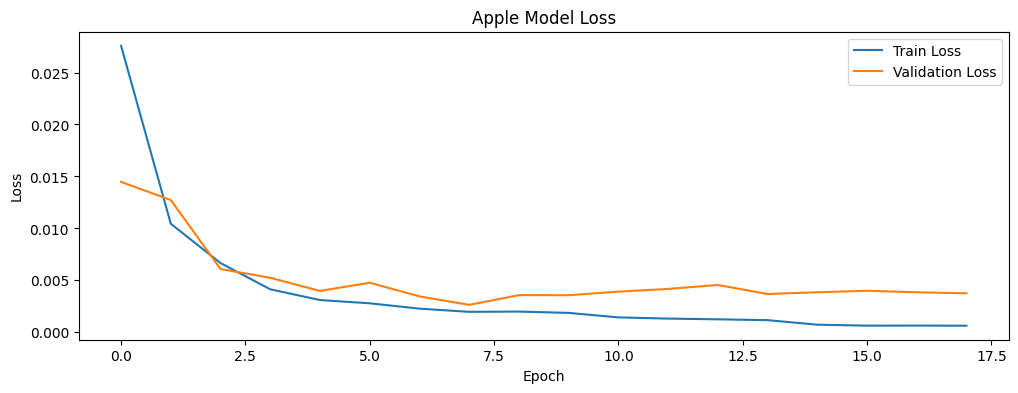

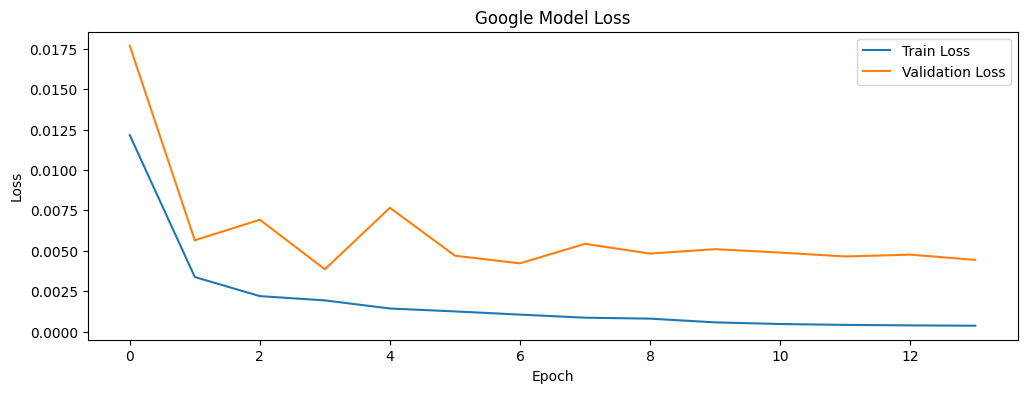

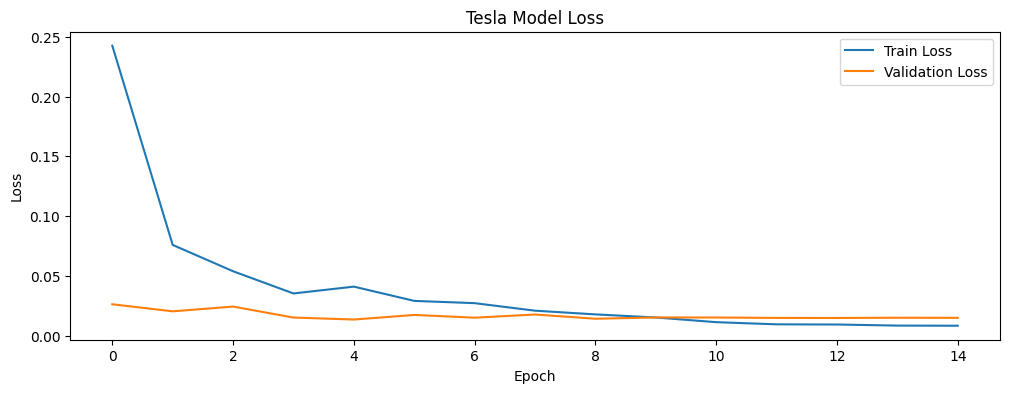

In [ ]:
# 绘制苹果数据集的训练和验证损失
plt.figure(figsize=(12, 4))
plt.plot(history_apple.history['loss'], label='Train Loss')
plt.plot(history_apple.history['val_loss'], label='Validation Loss')
plt.title('Apple Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 绘制谷歌数据集的训练和验证损失
plt.figure(figsize=(12, 4))
plt.plot(history_google.history['loss'], label='Train Loss')
plt.plot(history_google.history['val_loss'], label='Validation Loss')
plt.title('Google Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 绘制特斯拉数据集的训练和验证损失
plt.figure(figsize=(12, 4))
plt.plot(history_tesla.history['loss'], label='Train Loss')
plt.plot(history_tesla.history['val_loss'], label='Validation Loss')
plt.title('Tesla Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# 预测苹果数据集
y_pred_apple = model_apple.predict(X_test_apple_reshaped).flatten()
print("CNN-LSTM Apple Predictions:")
print(y_pred_apple)
print("Apple Actual Values:")
print(y_test_apple)

# 预测谷歌数据集
y_pred_google = model_google.predict(X_test_google_reshaped).flatten()
print("CNN-LSTM Google Predictions:")
print(y_pred_google)
print("Google Actual Values:")
print(y_test_google)

# 预测特斯拉数据集
y_pred_tesla = model_tesla.predict(X_test_tesla_reshaped).flatten()
print("CNN-LSTM Tesla Predictions:")
print(y_pred_tesla)
print("Tesla Actual Values:")
print(y_test_tesla)


3/3 [==============================] - 1s 38ms/step
CNN-LSTM Apple Predictions:
[ 0.25232887  0.22483578  0.22587724  0.19387934  0.1719822   0.17193247
  0.16262026  0.16297902  0.16949202  0.15016888  0.13656054  0.10434961
  0.07980557  0.07529326  0.07746576  0.07606684  0.05620439  0.08392972
  0.0774779   0.10759298  0.07592843  0.12400458  0.10734504  0.13608326
  0.12560605  0.14502355  0.13619085  0.11887127  0.12687202  0.11197524
  0.0924131   0.08100186  0.07183352  0.05673756  0.06562596  0.04778644
  0.00931514  0.03416109  0.02320618  0.01838564  0.00249217  0.01094243
 -0.00145918 -0.0012446   0.03243006  0.01728445  0.02419983  0.01311959
  0.05452475  0.04754432  0.08029573  0.04848937  0.00761628 -0.033335
 -0.0350121  -0.04984255 -0.05764567 -0.04827805 -0.02503102 -0.02829934
 -0.03627767 -0.08407684 -0.09769368 -0.112072   -0.1221924  -0.08857065
 -0.09176989 -0.08233361]
Apple Actual Values:
[ 1.75240190e-01  1.43342929e-01  1.48193556e-01  1.29542568e-01
  1.266

In [ ]:
# 定义一个函数来计算和打印性能指标
def print_performance_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    epsilon = 1e-8
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{dataset_name} Performance Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"R²: {r2}")
    print()

# 计算并打印苹果数据集的性能指标
print_performance_metrics(y_test_apple, y_pred_apple, "Apple")

# 计算并打印谷歌数据集的性能指标
print_performance_metrics(y_test_google, y_pred_google, "Google")

# 计算并打印特斯拉数据集的性能指标
print_performance_metrics(y_test_tesla, y_pred_tesla, "Tesla")


Apple Performance Metrics:
MSE: 0.0026190256264102987
RMSE: 0.05117641670154622
MAE: 0.0419879132451466
MAPE: 535.4201289164502
R²: 0.37517039452810885

Google Performance Metrics:
MSE: 0.004099467221728249
RMSE: 0.06402708193981864
MAE: 0.051824821135745505
MAPE: 88.68570436419105
R²: 0.5978457745333817

Tesla Performance Metrics:
MSE: 0.035447389479827375
RMSE: 0.1882747712250034
MAE: 0.15939430175901578
MAPE: 129.8448163788631
R²: 0.46146596380815263



In [ ]:
import matplotlib.pyplot as plt

# 绘制实际值与预测值的对比图
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# 错误分布分析
def plot_error_distribution(y_true, y_pred, title):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=50)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# 为苹果数据集绘图
plot_actual_vs_predicted(y_test_apple, y_pred_apple, 'Apple Actual vs Predicted')
plot_error_distribution(y_test_apple, y_pred_apple, 'Apple Prediction Error Distribution')

# 为谷歌数据集绘图
plot_actual_vs_predicted(y_test_google, y_pred_google, 'Google Actual vs Predicted')
plot_error_distribution(y_test_google, y_pred_google, 'Google Prediction Error Distribution')

# 为特斯拉数据集绘图
plot_actual_vs_predicted(y_test_tesla, y_pred_tesla, 'Tesla Actual vs Predicted')
plot_error_distribution(y_test_tesla, y_pred_tesla, 'Tesla Prediction Error Distribution')
